In [18]:
import uproot as ur
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import awkward as ak
import mplhep as hep
import vector
hep.style.use("CMS")

In [42]:
data_directory = "./scripts/"
file_name = "breit_output.root"
with ur.open("{file}:jets".format(file=data_directory+file_name)) as out:
    jets = out.arrays(["eta", "px", "py", "pz", "E"])
    print("Number of events:",out.num_entries)
with ur.open("{file}:event".format(file=data_directory+file_name)) as event:
    event_info = event.arrays(["Q2"])
    print("Number of events:",event.num_entries)

Number of events: 5000
Number of events: 5000


In [43]:
Q = np.sqrt(event_info["Q2"])
n = vector.obj(px=0, py = 0, pz=1, E=1)
z_jet =  []
for i, (px_event, py_event, pz_event, E_event) in enumerate(zip(jets["px"], jets["py"], jets["pz"], jets["E"])):
    event_z_jet = []
    for px, py, pz, E in zip(px_event, py_event, pz_event, E_event):
        jet_vec = vector.obj(px=px, py=py, pz=pz, E=E)
        z = n.dot(jet_vec) / Q[i]
        event_z_jet.append(z)
    if event_z_jet:
        z_jet.append(event_z_jet)
z_jet = ak.Array(z_jet)

Text(1, 0, '$z_{jet}$')

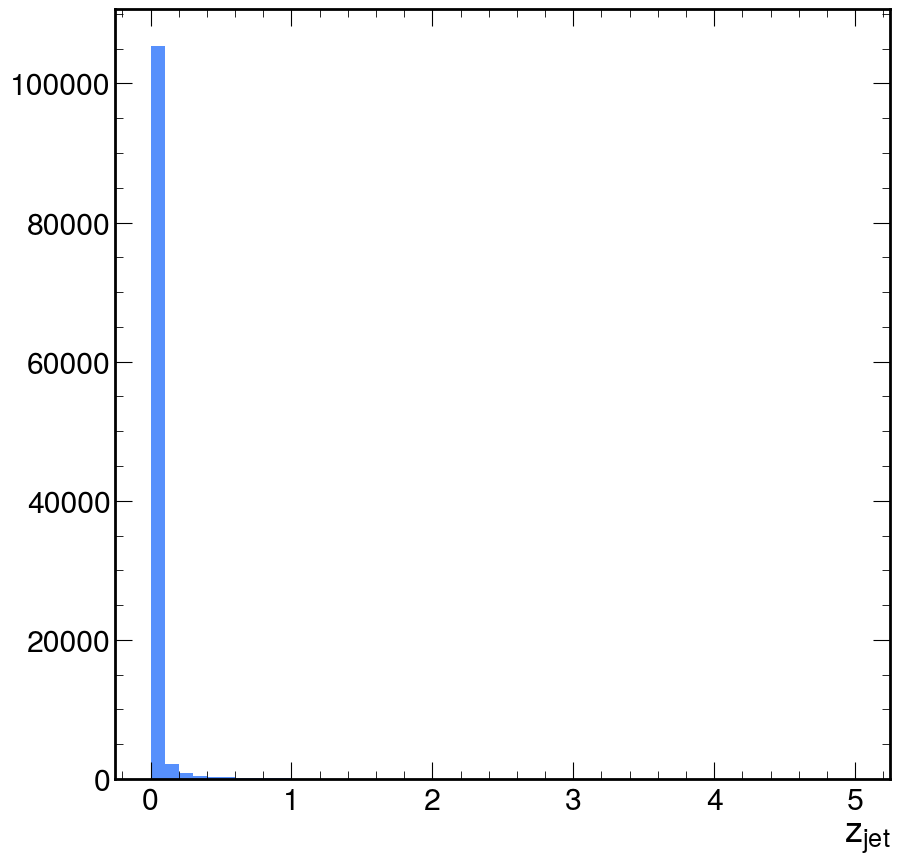

In [45]:
plt.hist(ak.flatten(z_jet), bins = 50, range=(0, 5))
plt.xlabel("$z_{jet}$")

Text(0.5, 1.0, 'Highest energy jet in each event')

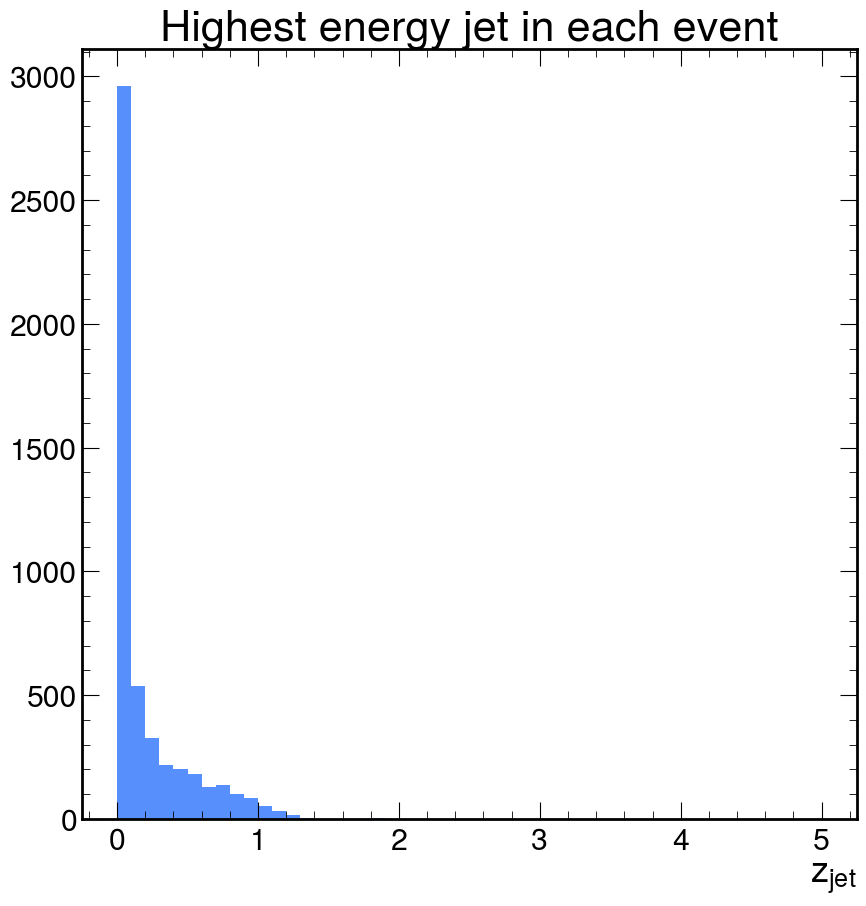

In [32]:
plt.hist(z_jet[:,0], bins = 50, range=(0, 5))
plt.xlabel("$z_{jet}$")
plt.title("Highest energy jet in each event")

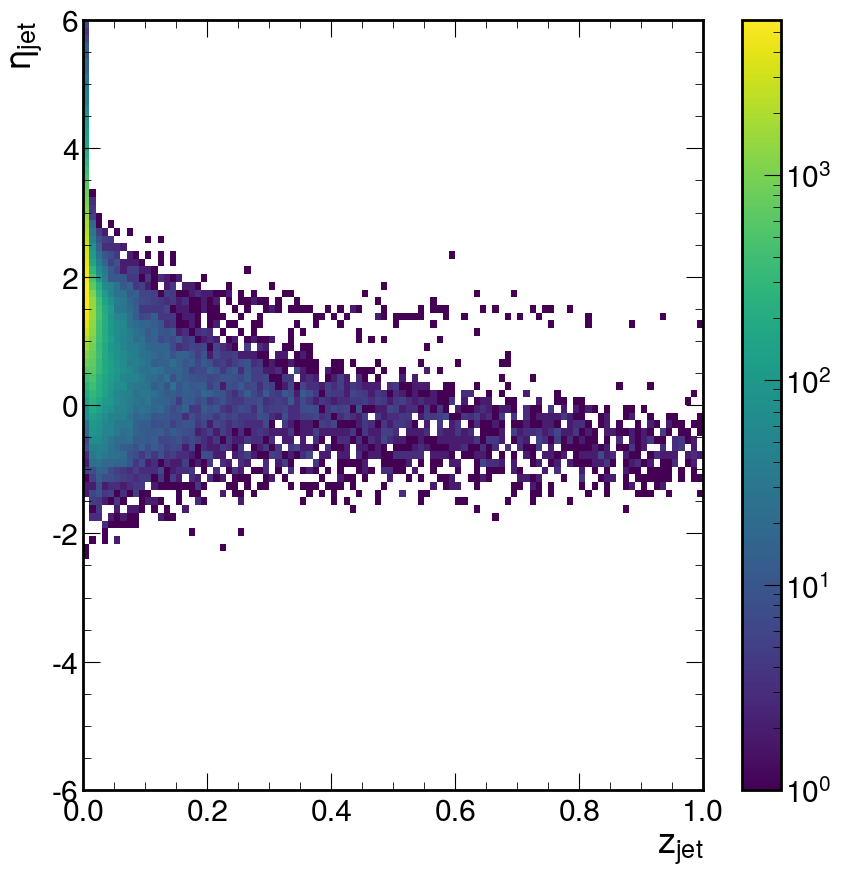

In [38]:
plt.hist2d(np.asarray(ak.flatten(z_jet)), np.asarray(ak.flatten(jets["eta"])), bins=(100,100), range=[(0,1), (-6,6)], norm = colors.LogNorm())
plt.xlabel("$z_{jet}$")
plt.ylabel("$\eta_{jet}$")
plt.colorbar()